# Analysis survey

In [32]:
# Import modules
import os 

import json
import csv
import math
from textwrap import wrap
import itertools 
from itertools import combinations

# Classic analysis imports
import numpy as np 
import pandas as pd 
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import seaborn as sns
import plot_likert

# options for the notebook
pd.set_option('display.max_colwidth',1000)
plt.style.use('seaborn')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams.update({'font.size': 18})

## Load data

In [33]:
df = pd.read_csv('./survey/data/ELIXIR BioHackathon 35 FAIRX (Responses) - Form responses 1.csv')

## Colnames

rename_col = {'1. If you develop or maintain databases: How often these resources include the following variables in their data model?   [Sex]': "Maintainer - Sex",
              '1. If you develop or maintain databases: How often these resources include the following variables in their data model?   [Gender]': "Maintainer - Gender",
              '1. If you develop or maintain databases: How often these resources include the following variables in their data model?   [Age]': "Maintainer - Age",
              '1. If you develop or maintain databases: How often these resources include the following variables in their data model?   [Ethnicity]': "Maintainer - Ethnicity",
              '1. If you develop or maintain databases: How often these resources include the following variables in their data model?   [Race]': "Maintainer - Race",
              '2. If you are a researcher: How often do you include the following variables in your datasets? [Sex]': "Researcher - Sex",
              '2. If you are a researcher: How often do you include the following variables in your datasets? [Gender]': "Researcher - Gender",
              '2. If you are a researcher: How often do you include the following variables in your datasets? [Age]': "Researcher - Age",
              '2. If you are a researcher: How often do you include the following variables in your datasets? [Ethnicity]': "Researcher - Ethnicity",
              '2. If you are a researcher: How often do you include the following variables in your datasets? [Race]': "Researcher - Race",
              '3. Does your interpretation of results include a intersectional analysis (sex, gender, age, ethnicity, race)? ': "Intersectional analysis",
              '4. Are you familiarised with guidelines for collection sex/gender/age/race/ethnicity or recommendations of best practices in biomedical research? (e.g. DOME: https://www.nature.com/articles/s41592-021-01205-4; SAGER: https://researchintegrityjournal.biomedcentral.com/articles/10.1186/s41073-016-0007-6#ref-CR15)': "Diversity knowledge",
              '5. Do you think capturing diversity (e.g., sex, gender, age, ethnicity) for biomedical research should be:': "Diversity capture",
              '6. How relevant do you consider the diversity (e.g., sex, gender, age, ethnicity) for biomedical research in your analysis?': "Diversity relevance",
              '7.  Would you be interested in receiving training on social and ethical implications of biomedical research? ': "Training in socio-ethics",
              '8. Have you experienced difficulties with datasets having many missing values of diversity data due to medical data providers withdrawing (parts of) informed consent?': "Missing diversity data",
              '9. How important is educating medical data providers to help raise awareness on the importance of diversity data? ': "Diversity awareness",
              '10. The European Commission has published a Gender equality plan to opt for research fundings. Also the Gendered Innovation published a report recommending how to introduce the sex and gender dimension in biomedical research.Requirements from journal editorial policies can have a powerful benefit as well, the adoption of a requirement to publish a crystal structure in the wwPDB or sequence to the NCBI helped drive such depositing practices to standard. How important is to include diversity information in publication and funding processes? ': "Diversity information",
              '11. Which mechanisms should be put in place to ensure that public and private biomedical research capture diversity dimension?': "Capturing diversity",
              '12. Are you a participant in the ELIXIR BioHackathon 2021?': "BioHackathon 2021 Participant",
              '13. Pronouns ': "Pronouns",
              '14. Age ': "Age",
              '15. Country: Place of Work': "Country",
              '16. Profession ': "Profession",
              '17. How do you use data in your work? ': "Use of data",
              '18. Work Experience ': "Work Experience",
              '"I accept the following privacy terms in compliance with the RGPD - General Data Protection Regulation (Regulation (EU) 2016/679 of the European Parliament of April 27, 2016 regarding the protection of natural persons with regard to treatment of personal data and the free circulation of these data and by which Directive 95/46 / CE is repealed): Your personal data are incorporated into files and treatments for which BIONFO4WOMEN PROGRAM - BARCELONA SUPERCOMPUTING CENTER is responsible, its purpose being the establishment and development of their relationship with the program, the accounting, fiscal and administrative management of the entity, allowing their participation in all kinds of activities and events that are held, sending communications by any means that they have provided us. The consent of the person interested in joining or participating in the activities of the entity is the cause of legitimacy for said treatments. These data will be kept indefinitely as long as you do not express your will to the contrary. Your data will not be transferred to any entity without your consent, except for the sessions provided by law. You can also, if your rights are not taken care of, present your claim to the Spanish Data Protection Agency. "': 'Consent'}

df = df.rename(columns=rename_col)

In [34]:
df.head()

,Timestamp,Maintainer - Sex,Maintainer - Gender,Maintainer - Age,Maintainer - Ethnicity,Maintainer - Race,Researcher - Sex,Researcher - Gender,Researcher - Age,Researcher - Ethnicity,...,Diversity information,Capturing diversity,BioHackathon 2021 Participant,Pronouns,Age,Country,Profession,Use of data,Work Experience,Consent
0,10/11/2021 16:02:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Important for both,I don´t know,Yes,She/her,25-34 years old.,Spain,Researcher,NaN,< 1 year,I have read and accept the terms & conditions
1,10/11/2021 16:13:15,Never (1),Always (5),Never (1),Never (1),Never (1),NaN,NaN,NaN,NaN,...,Important for both,"Self-assessment / Check list, International Standards, Requirements by funding bodies, Regulated bodies (e.g., FDA, EMA)",No,He/him,35-44 years old.,Germany,Project Manager,"Developer, Curator, Creator",1 to 5 years,I have read and accept the terms & conditions
2,10/11/2021 16:13:45,Always (5),Never (1),Always (5),Never (1),Never (1),Very Frequently (4),Very Rarely (2),Occasionally (3),Very Rarely (2),...,Not important,None,Yes,Prefer not to say.,25-34 years old.,NaN,NaN,"Consumer, Developer, Creator",1 to 5 years,I have read and accept the terms & conditions
3,10/11/2021 16:15:14,Occasionally (3),Never (1),Occasionally (3),Very Rarely (2),Very Rarely (2),Occasionally (3),Never (1),Occasionally (3),Never (1),...,The reasons behind how important is for the different parties usually collides,"International Standards, Requirements by funding bodies, Regulated bodies (e.g., FDA, EMA)",Yes,He/him,45-54 years old.,Spain,Bioinformatician,"Consumer, Developer",More than 15 years,I have read and accept the terms & conditions
4,10/11/2021 16:21:57,Very Frequently (4),Very Frequently (4),Very Frequently (4),Never (1),Never (1),Very Frequently (4),Very Frequently (4),Occasionally (3),Very Rarely (2),...,Important for both,"International Standards, Codes of conduct",Yes,Prefer not to say.,25-34 years old.,Spain,NaN,Curator,6 to 10 years,I have read and accept the terms & conditions


## Information about data present in the different database as maintainer and Researchers

I transformed the likert scale (Never, ... Always) into numerical value from 0 to 4. 
The following radar plot takes the average of these values for both the maintainer and the researchers, to see if there are substantial difference in the different information available and/or between researchers and maintainers. 

In [45]:
## Rename likert scales for presentation

likert_renames = {'Never (1)': 'Never',
                  'Very Rarely (2)':  'Very Rarely',
                  'Occasionally (3)':  'Occasionally',
                  'Very Frequently (4)':  'Very Frequently',
                  'Always (5)': 'Always'}
df = df.replace(likert_renames)

### Radar plot: Plotting them on the same plot

In [46]:
# Transform into int to get the means for radar plots
likert_trans_int = {'Never': 0,
                  'Very Rarely': 1,
                  'Occasionally': 2,
                  'Very Frequently': 3,
                  'Always': 4}
# Get the means for each questions
maintainers_avg = [df["Maintainer - Sex"].replace(likert_trans_int).mean(), 
                   df["Maintainer - Gender"].replace(likert_trans_int).mean(), 
                   df["Maintainer - Age"].replace(likert_trans_int).mean(), 
                   df["Maintainer - Ethnicity"].replace(likert_trans_int).mean(), 
                   df["Maintainer - Race"].replace(likert_trans_int).mean()]
maintainers_avg = [*maintainers_avg, maintainers_avg[0]]  # To fix a bug
researchers_avg = [df["Researcher - Sex"].replace(likert_trans_int).mean(),
                   df["Researcher - Gender"].replace(likert_trans_int).mean(), 
                   df["Researcher - Age"].replace(likert_trans_int).mean(), 
                   df["Researcher - Ethnicity"].replace(likert_trans_int).mean(),
                   df["Researcher - Race"].replace(likert_trans_int).mean()]
researchers_avg = [*researchers_avg, researchers_avg[0]]  # To fix a bug

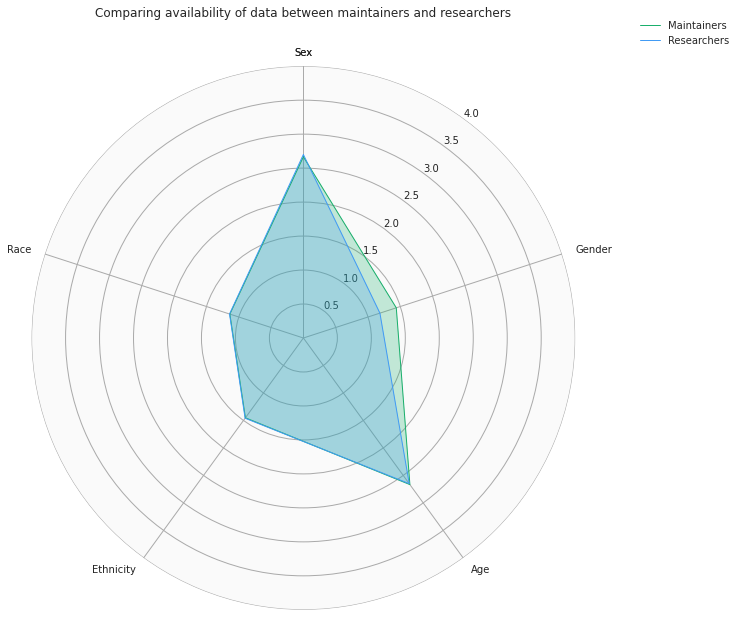

In [47]:
# Source: stackoverflow but cannot find it back

# Each attribute we'll plot in the radar chart.
categories = ['Sex', 'Gender', 'Age', 'Ethnicity', 'Race']

# Number of variables we're plotting.
num_vars = len(categories)
categories = [*categories, categories[0]]  # To fix a bug

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plots 
ax.plot(angles, maintainers_avg, color='#1aaf6c', linewidth=1, label='Maintainers')
ax.fill(angles, maintainers_avg, color='#1aaf6c', alpha=0.25)
ax.plot(angles, researchers_avg, color='#429bf4', linewidth=1, label='Researchers')
ax.fill(angles, researchers_avg, color='#429bf4', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), categories)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 4.
ax.set_ylim(0, 4)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-5) labels smaller.
#ax.tick_params(axis='y', labelsize=8)

# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')

# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')

# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# Add title.
ax.set_title('Comparing availability of data between maintainers and researchers', y=1.08)

# Add a legend as well.
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))


#### Plotting them on two separated plots

Text(0.5, 1.08, 'Data availability for maintainers')

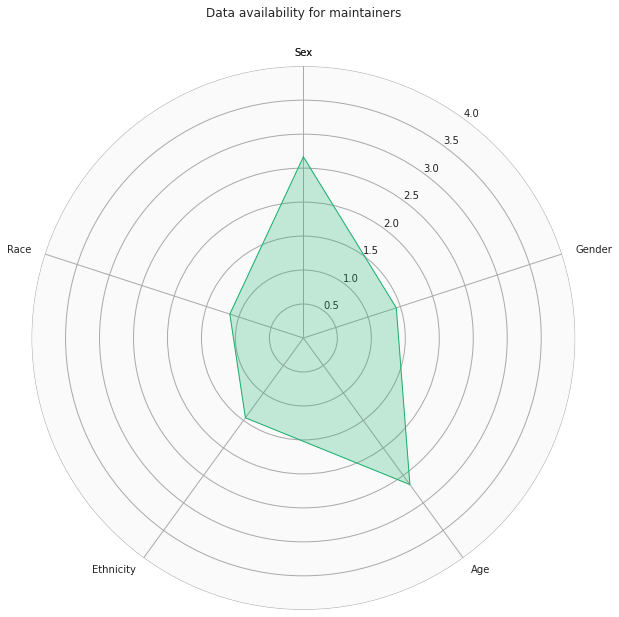

In [49]:
# Source: stackoverflow but cannot find it back

# Each attribute we'll plot in the radar chart.
categories = ['Sex', 'Gender', 'Age', 'Ethnicity', 'Race']

# Number of variables we're plotting.
num_vars = len(categories)
categories = [*categories, categories[0]]  # To fix a bug

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plots 
ax.plot(angles, maintainers_avg, color='#1aaf6c', linewidth=1, label='Maintainers')
ax.fill(angles, maintainers_avg, color='#1aaf6c', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), categories)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 4.
ax.set_ylim(0, 4)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-5) labels smaller.
#ax.tick_params(axis='y', labelsize=8)

# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')

# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')

# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# Add title.
ax.set_title('Data availability for maintainers', y=1.08)

Text(0.5, 1.08, 'Data availability for researchers')

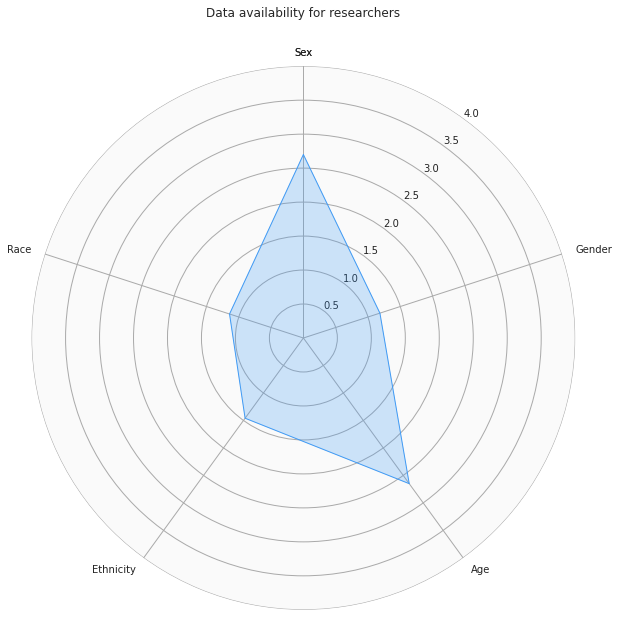

In [50]:
# Source: stackoverflow but cannot find it back

# Each attribute we'll plot in the radar chart.
categories = ['Sex', 'Gender', 'Age', 'Ethnicity', 'Race']

# Number of variables we're plotting.
num_vars = len(categories)
categories = [*categories, categories[0]]  # To fix a bug

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plots 
ax.plot(angles, researchers_avg, color='#429bf4', linewidth=1, label='Researchers')
ax.fill(angles, researchers_avg, color='#429bf4', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), categories)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 4.
ax.set_ylim(0, 4)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-5) labels smaller.
#ax.tick_params(axis='y', labelsize=8)

# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')

# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')

# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# Add title.
ax.set_title('Data availability for researchers', y=1.08)

### Normla likert scale plotting

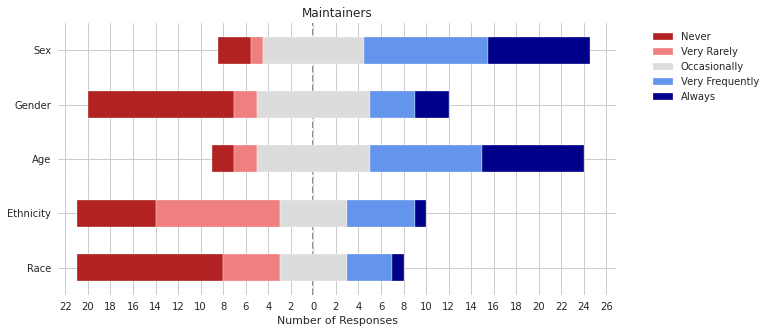

In [77]:
scale = ['Never', 'Very Rarely', 'Occasionally', 'Very Frequently', 'Always']

df_maintainers_bar = df[["Maintainer - Sex", "Maintainer - Gender", "Maintainer - Age", "Maintainer - Ethnicity", "Maintainer - Race"]]
df_maintainers_bar.columns = df_maintainers_bar.columns.str.replace('Maintainer - ', '', regex=True)
df_researchers_bar = df[["Researcher - Sex", "Researcher - Gender", "Researcher - Age", "Researcher - Ethnicity", "Researcher - Race"]]
df_researchers_bar.columns = df_researchers_bar.columns.str.replace('Researcher - ', '', regex=True)

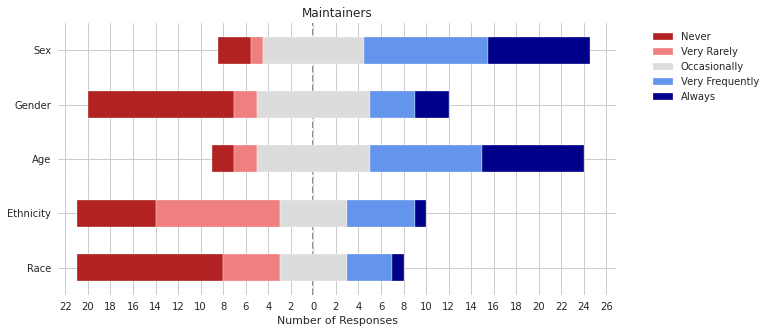

In [93]:
ax = plot_likert.plot_likert(df_maintainers_bar, scale, 
                        plot_percentage=False, figsize=(10, 5))
ax.set_title("Maintainers")
plt.show()

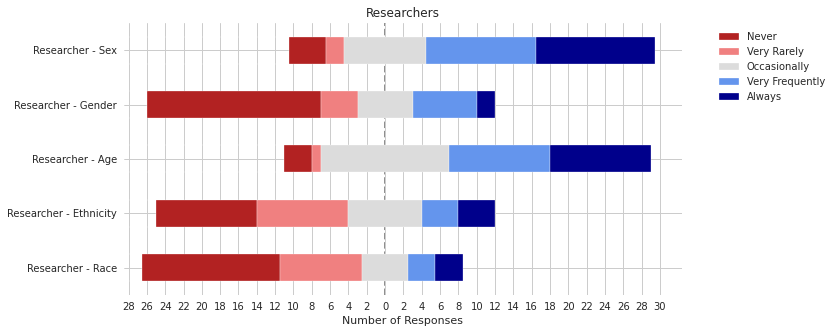

In [94]:
ax = plot_likert.plot_likert(df_researchers_bar, scale, 
                        plot_percentage=False, figsize=(10, 5))
ax.set_title("Researchers")
plt.show()

## Diversity information

This question need to be splitted to have all the possibilities. However, the vast majority claims the importance for both

In [130]:
df_div_info = pd.get_dummies(df['Diversity information'].str.split(',').str[0], dtype=bool)
df_div_info = df_div_info.apply(pd.value_counts).transpose().sort_values(by=True, ascending=False)
df_div_info = df_div_info.sort_values(by=[True], ascending=False)
df_div_info

,False,True
Important for both,18,48
Not important,61,5
Important only for publications and Intellectual Property (IP),63,3
Depends on the field - there can potentially be cons as well as pros e.g. in genetics,65,1
Gender is not relevant to my work,65,1
Important only for fundering agencies,65,1
The reasons behind how important is for the different parties usually collides,65,1


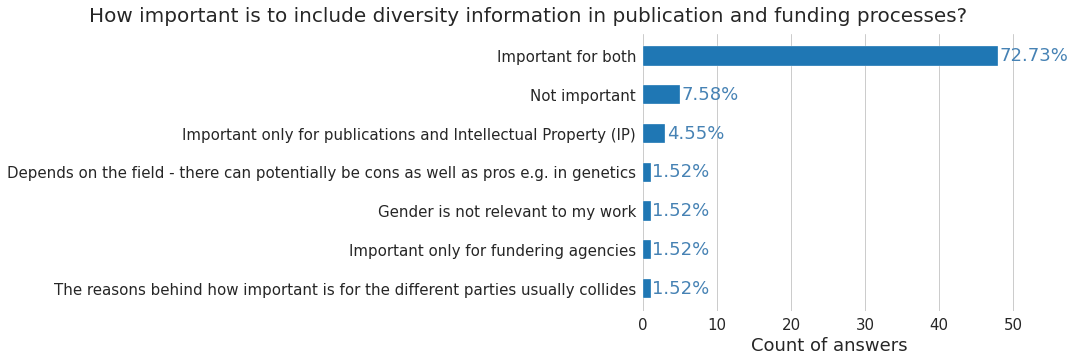

In [135]:
labels = df_div_info.index
count_true = df_div_info[True]
count_perc = df_div_info[True]/(df_div_info[True]+df_div_info[False])*100
width = 0.5
fig, ax = plt.subplots(figsize=(15,5))

ax.barh(labels, count_true, width, color='tab:blue')
for i, v in enumerate(count_perc):
    plt.text(count_true[i]+0.2, i, "{}%".format(str(round(v, 2))), color='steelblue', va="center")
    
ax.set_xlabel("Count of answers", fontsize='medium')

ax.yaxis.grid(False)   
ax.xaxis.grid(True)                                                 

plt.xticks(fontsize='small')
plt.yticks(fontsize='small')

plt.tight_layout()

plt.suptitle('How important is to include diversity information in publication and funding processes?', fontsize=20,  y=1.02)
plt.gca().invert_yaxis()
plt.show()

## Use of data

In [109]:
df_use_data = pd.get_dummies(df['Use of data'].str.split(',').str[0], dtype=bool)
df_use_data = df_use_data.apply(pd.value_counts).transpose().sort_values(by=True, ascending=False)
df_use_data = df_use_data.sort_values(by=[True], ascending=False)
df_use_data

,False,True
Consumer,31,35
Developer,50,16
Curator,57,9
Creator,62,4
only involved in research support; not working in the field,65,1


In [106]:
labels = df_use_data.index
count_true = df_use_data[True]
width = 0.5
fig, ax = plt.subplots(figsize=(15,5))

ax.barh(labels, count_true, width, color='tab:blue')
for i, v in enumerate(sorted(count_true, reverse=True)):
    plt.text(v+0.2, i, str(round(v, 2)), color='steelblue', va="center")
    
ax.set_xlabel("Count of answers", fontsize='medium')

ax.yaxis.grid(False)   
ax.xaxis.grid(True)                                                 

plt.xticks(fontsize='small')
plt.yticks(fontsize='small')

plt.tight_layout()

plt.suptitle('How do you use data in your work?', fontsize=20,  y=1.02)
plt.gca().invert_yaxis()
plt.show()

NameError: name 'df_use_data' is not defined

## Capturing diversity

In [138]:
df_div_capt = pd.get_dummies(df['Capturing diversity'].str.split(',').str[0], dtype=bool)
df_div_capt = df_div_capt.apply(pd.value_counts).transpose().sort_values(by=True, ascending=False)
df_div_capt

,False,True
Self-assessment / Check list,40,26
International Standards,43,23
I don´t know,59,7
Codes of conduct,63,3
Legal Regulation,63,3
Editorial Policy Requirements,65,1
None,65,1
Requirements by funding bodies,65,1
Sex info is vital in biomedicine,65,1


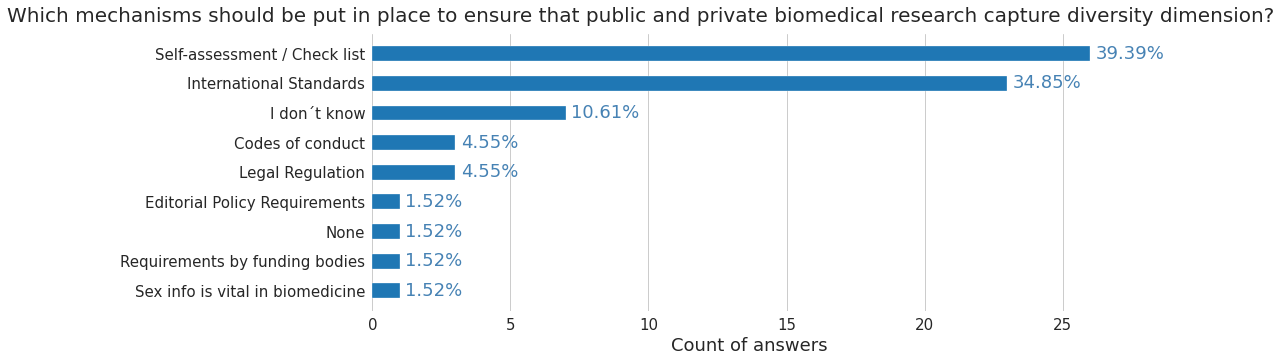

In [140]:
labels = df_div_capt.index
count_true = df_div_capt[True]
count_perc = df_div_capt[True]/(df_div_capt[True]+df_div_capt[False])*100

width = 0.5
fig, ax = plt.subplots(figsize=(15,5))

ax.barh(labels, count_true, width, color='tab:blue')
for i, v in enumerate(count_perc):
    plt.text(count_true[i]+0.2, i, "{}%".format(str(round(v, 2))), color='steelblue', va="center")
    
ax.set_xlabel("Count of answers", fontsize='medium')

ax.yaxis.grid(False)   
ax.xaxis.grid(True)                                                 

plt.xticks(fontsize='small')
plt.yticks(fontsize='small')

plt.tight_layout()

plt.suptitle('Which mechanisms should be put in place to ensure that public and private biomedical research capture diversity dimension?', fontsize=20,  y=1.02)
plt.gca().invert_yaxis()
plt.show()

### Diversity Knowledge

In [164]:
df_div_know = df["Diversity knowledge"].value_counts(ascending=False).to_frame()#plot(kind='barh')
df_div_know

,Diversity knowledge
I don't know them,38
I know them and I use them,11
I know them but I don't need them,3
I know them but I don't apply them,2
I know them and I should use them,1
I know them but my current position does not concern their application,1
I am aware of general regulations such as GDPR but not biomedical specific guidelines as this is not my domain,1


In [191]:

    
    #return '\n'.join(string[i:i+lengLabel] for i in range(0, len(string)))


["I don't know\nthem",
 'I know them\nand I use\nthem',
 "I know them\nbut I don't\nneed them",
 "I know them\nbut I don't\napply them",
 'I know them\nand I should\nuse them',
 'I know them\nbut my current\nposition does not\nconcern their application',
 'I am aware\nof general regulations\nsuch as GDPR\nbut not biomedical\nspecific guidelines as\nthis is not\nmy domain']

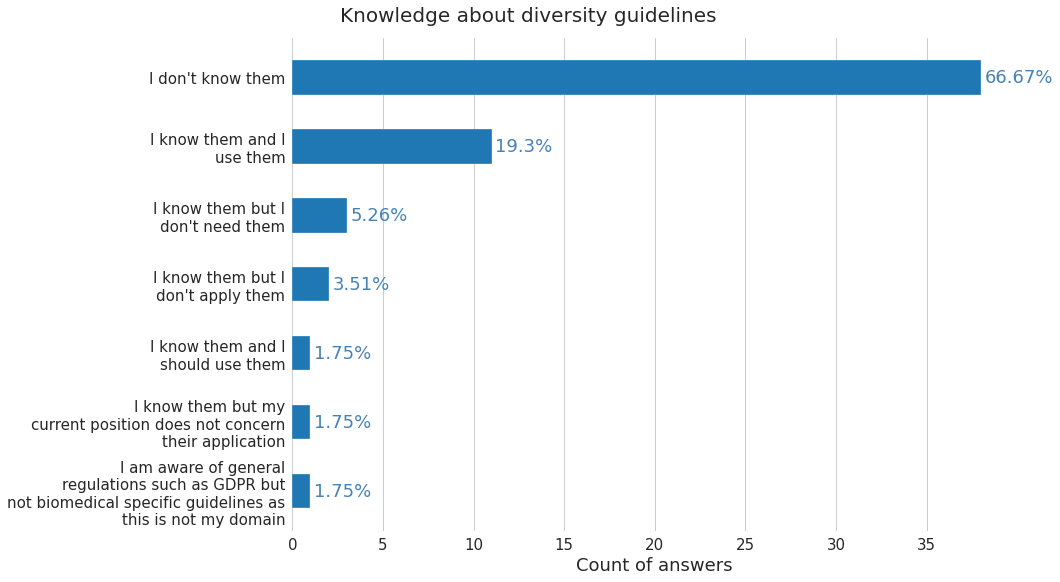

In [196]:
def insert_linebreak(string, max_words=5):
    string = string.split()
    return '\n'.join([' '.join(string[i:i+max_words]) for i in range(0,len(string),max_words)])

labels = df_div_know.index
labels = [insert_linebreak(i) for i in labels]
labels

count_true = df_div_know["Diversity knowledge"]
count_perc = count_true/sum(count_true)*100

width = 0.5
fig, ax = plt.subplots(figsize=(15,8))

ax.barh(labels, count_true, width, color='tab:blue')
for i, v in enumerate(count_perc):
    plt.text(count_true[i]+0.2, i, "{}%".format(str(round(v, 2))), color='steelblue', va="center")
    
ax.set_xlabel("Count of answers", fontsize='medium')

ax.yaxis.grid(False)   
ax.xaxis.grid(True)                                                 

plt.xticks(fontsize='small')
plt.yticks(fontsize='small')

plt.tight_layout()

plt.suptitle('Knowledge about diversity guidelines', fontsize=20,  y=1.02)
plt.gca().invert_yaxis()
plt.show()